In [17]:
#importar bibliotecas requeridas
import matplotlib.pyplot as plt
import numpy as np
import math
from timeit import default_timer as timer

In [18]:
def f(x):
    f = 0
    y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 0]
    for i in range(10):
        aux = x[i] - y[i]
        f += aux**2
        if i > 0:
            aux = x[i]-x[i-1]
            f += 2.5*aux**2
    return f


# gradiente  ∇f
def grad(x):
    y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 0]
    g = np.array([None]*10)
    for i in range(10):
        g[i] = 2.0*(x[i]-y[i])
        if i > 0:
            g[i] += 5*(x[i]-x[i-1])
        if i < 10-1:
            g[i] += 5*(x[i]-x[i+1])
    return g
   


def hessiano(x):
    # return axay
    return np.array([
        [7, -5, 0, 0, 0, 0, 0, 0, 0, 0],
        [-5, 12, -5, 0, 0, 0, 0, 0, 0, 0],
        [0, -5, 12, -5, 0, 0, 0, 0, 0, 0],
        [0, 0, -5, 12, -5, 0, 0, 0, 0, 0],
        [0, 0, 0, -5, 12, -5, 0, 0, 0, 0],
        [0, 0, 0, 0, -5, 12, -5, 0, 0, 0],
        [0, 0, 0, 0, 0, -5, 12, -5, 0, 0],
        [0, 0, 0, 0, 0, 0, -5, 12, -5, 0],
        [0, 0, 0, 0, 0, 0, 0, -5, 12, -5],
        [0, 0, 0, 0, 0, 0, 0, 0, -5, 7]
    ])


# dirección del gradiente p
def dirgrad(x):
    vgrad = grad(x)
    magGrad = np.sqrt(vgrad.dot(vgrad))
    p = -vgrad/magGrad
    return p

In [19]:
#Calculos de phi
def phiAlpha(x0, alpha, p):
    paX = x0 + p * alpha
    return f(paX)


def phipAlpha(x0, alpha, p):
    x = x0 + alpha * p
    vgrad = grad(x)
    return(np.dot(vgrad, p))


def phipp(x0, alpha, p):
    x = x0 + alpha * p
    ahess = hessiano(x)
    return np.dot(np.dot(ahess, p), p)


In [21]:
#Forsyte
def exhaustivoRefinado(p, xini, alpha=0, h=0.1, tol=1e-6):
    """Busqueda de minimo con metodo exhaustivo refinado. puedes cambiar el paso
    Retorna f(a) y alpha
    """
    k = 0
    while h > tol:
        while phiAlpha(xini, alpha+h, p) < phiAlpha(xini, alpha, p):
            alpha = alpha + h
            fnow = phiAlpha(xini, alpha, p)
            # print(k, h, fnow)
            k += 1
        alpha = alpha-h
        h = h / 10
    return alpha


def gradDescent(x0):
    p = dirgrad(x0)
    alpha = exhaustivoRefinado(p, x0)
    # TODO: buscar alpha con newton para mayor precisión ?
    x0 = x0 + alpha*p
    return x0


def forsyte(x0, k=0, m=0, tol=1e-4):
    """Algoritmo de forsyte."""
    print("k, x^(k), p^(k), f(x^k), t")
    while np.linalg.norm(grad(x0)) >= tol:
        x1 = gradDescent(x0)
        x2 = gradDescent(x1)
        y = x2
        d = (y - x0)/np.linalg.norm(y - x0)
        alpha = exhaustivoRefinado(d, x0)
        # TODO: buscar alpha con newton para mayor precisión ?
        # print(f"alpha: {alpha}")
        x0 = x0 + alpha*d
        itTime = timer()
        print(f"{k}, {x0}, {d} , {f(x0)},{itTime}")
        k = k + 1
    return x0


x0List = [1, 2, 3, 4, 5, 4, 3, 2, 1, 0]
x0 = np.array(x0List)
start = timer()
print(start)
xfin = forsyte(x0)
end = timer()
print(end)
print(f"Tiempo de ejecución: {end-start} s")
print(f"Evaluacion del mínimo: {grad(xfin)}")


15607.624976438
k, x^(k), p^(k), f(x^k), t
0, [1.9494105924958476 2.2945251168373497 3.0 3.4109497663253006
 3.690229048683004 3.4109497663253006 3.0 2.0 1.2945251168373497
 0.9494105924958478], [0.45335044997698265 0.14063788133722535 0.0 -0.2812757626744507
 -0.6254251372795147 -0.2812757626744507 0.0 0.0 0.14063788133722535
 0.45335044997698276] , 11.204088704090351,15607.697890762
1, [1.9618513663076436 2.363191852498609 2.9092594681779724 3.414362608228895
 3.7026694095737587 3.3736278578109538 2.7777841859380046
 2.0907405318220276 1.4446613533344912 0.9618513663076436], [0.04036905473429432 0.22281662316747392 -0.2944438626694731
 0.011074327344096448 0.04036771484721355 -0.12110582431580219
 -0.7210678769988432 0.2944438626694731 0.487176926487272
 0.040369054734293905] , 10.622587614231216,15607.743800351
2, [1.9772960248461087 2.3663531777096454 2.911229046128392
 3.3952543094911234 3.639499340725757 3.3334532066513147
 2.7728768494239833 2.0887709538716077 1.465515663375248


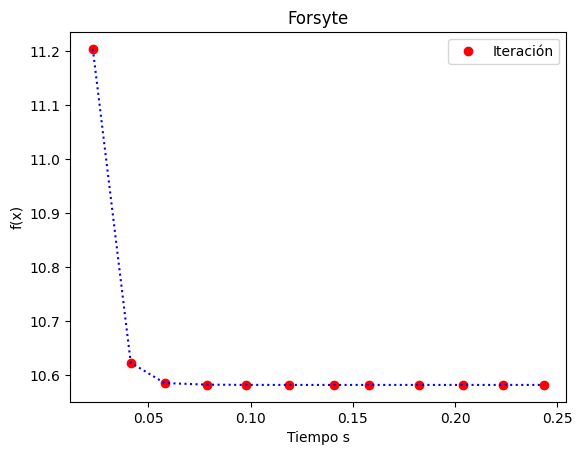

In [ ]:
# graficación Forsyte

tiempoForsyte = [
    0.022786, 0.041330, 0.057868, 0.078656, 0.097830, 0.118967, 0.140841, 0.157946, 0.182144, 0.203673, 0.223675, 0.243410
]
fxForsyte = [
    11.2040887,   10.62258761,   10.58483781,   10.58179633,   10.58138438,   10.58131913,   10.58130735,   10.58130519,   10.58130479,   10.58130472,   10.5813047,   10.5813047
]
plt.plot(tiempoForsyte, fxForsyte, 'ro', label="Iteración")
plt.plot(tiempoForsyte, fxForsyte, 'b:')
# plt.ylim(ymin= -0.429, ymax= -0.4288)
plt.ylabel('f(x)')
plt.xlabel('Tiempo s')
plt.legend(loc=1)
plt.title("Forsyte")
plt.show()


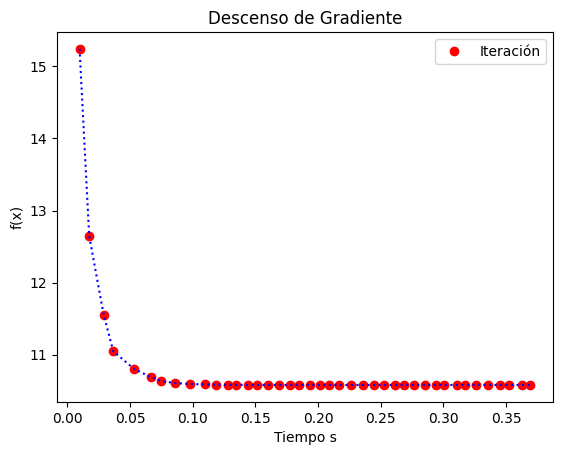

In [ ]:
# Graficación descenso de Gradiente
tiempoGrad = [
    0.009829678, 0.017498337, 0.029041721, 0.036718891, 0.053100303, 0.066581562, 0.0751099, 0.085905676, 0.097811971, 0.109968449, 0.118700535, 0.128131648, 0.134731292, 0.14413273, 0.151182777, 0.160260921, 0.168505892, 0.177934307, 0.184970165, 0.193236713, 0.201250082, 0.209042233, 0.217017867, 0.226458963, 0.235769348, 0.244944567, 0.252836613, 0.261304291, 0.268776041, 0.276767165, 0.285242966, 0.293894969, 0.300590685, 0.310626079, 0.31757122, 0.325883724, 0.335454842, 0.345306087, 0.352460687, 0.362402376, 0.369465087
]
fxGrad = [
    15.24193548, 12.64746192, 11.55586434, 11.04747221, 10.80609898, 10.6902812, 10.63442945, 10.60737555, 10.59420282, 10.58775194, 10.58456719, 10.58298065, 10.58218031, 10.58177114, 10.58155822, 10.58144545, 10.58138442, 10.58135074, 10.58133173, 10.58132081, 10.58131441, 10.58131061, 10.58130832, 10.58130693, 10.58130608, 10.58130556, 10.58130523, 10.58130503, 10.58130491, 10.58130483, 10.58130478, 10.58130475, 10.58130473, 10.58130472, 10.58130471, 10.58130471, 10.5813047, 10.5813047, 10.5813047, 10.5813047, 10.5813047
]
plt.plot(tiempoGrad, fxGrad, 'ro', label="Iteración")
plt.plot(tiempoGrad, fxGrad, 'b:')
plt.legend(loc=1)
plt.ylabel('f(x)')
plt.xlabel('Tiempo s')
plt.title("Descenso de Gradiente")
plt.show()


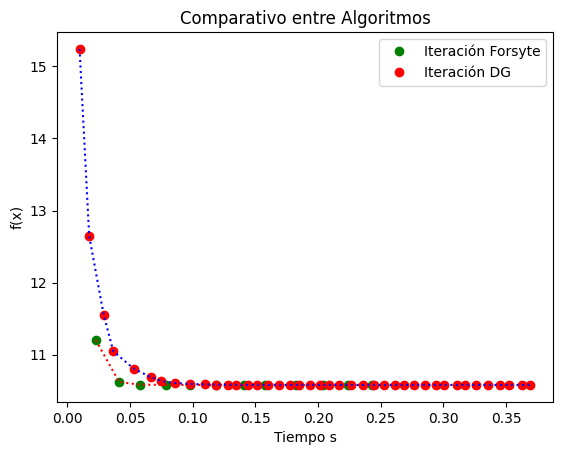

In [ ]:
plt.plot(tiempoForsyte, fxForsyte, 'go', label="Iteración Forsyte")
plt.plot(tiempoForsyte, fxForsyte, 'r:')

plt.plot(tiempoGrad, fxGrad, 'ro', label="Iteración DG")
plt.plot(tiempoGrad, fxGrad, 'b:')
plt.legend(loc=1)
plt.ylabel('f(x)')
plt.xlabel('Tiempo s')
plt.title("Comparativo entre Algoritmos")
plt.show()